In [3]:
# Установка пакетов oligo, oligoData, limma, maqcExpression4plex,
# genefilter, ggplot2, ggplots
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("oligo")
BiocManager::install("oligoData")
BiocManager::install("limma")
BiocManager::install("maqcExpression4plex")
BiocManager::install("genefilter")
BiocManager::install("ggplot2")
BiocManager::install("gplots")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'oligo'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'sys', 'tidyr'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'oligoData'

Warning message in install.packages(...):
“installation of package ‘oligoData’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'sys', 'tidyr'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'limma'

Warning message in install.packages(...):
“installation of package ‘limma’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library("oligo")
library("oligoData")

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: oligoClasses

Welcome to oligoClasses version 1.50.0

Loading required package: Bi

### Немного о датасете: в нем 24к генов, полученных с помощью  NimbleGen Systems from the human (HG18) 4-plex array



In [2]:
# Получаем путь к папке с датасетом
data.dir <- system.file("extdata", package="maqcExpression4plex")

# Получаем абсолютные пути к файлам 
files.path <- oligo::list.xysfiles(data.dir, full.names=TRUE)

# Выводим только названия файлов
basename(files.path)

[1] "9868701_532.xys" "9868901_532.xys" "9869001_532.xys" "9870301_532.xys"
[5] "9870401_532.xys" "9870601_532.xys"

In [3]:
# Создаем разметку для наших файлов
diseases <- c('brain',
              'brain',
              'brain',
             'universal reference',
             'universal reference',
             'universal reference'
             )

data <- data.frame(Key = diseases)
# Добавляем аннотации к файлам
rownames(data) <- basename(files.path)
data

,Key
,<chr>
9868701_532.xys,brain
9868901_532.xys,brain
9869001_532.xys,brain
9870301_532.xys,universal reference
9870401_532.xys,universal reference
9870601_532.xys,universal reference


In [4]:
# Создаем новый экземпляр AnnotatedDataFrame
# Он нужен для того, чтобы сопоставить файл к классу
pd <- Biobase::AnnotatedDataFrame(data = data)
pd

An object of class 'AnnotatedDataFrame'
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: Key
  varMetadata: labelDescription

In [5]:
# Читаем xys файлы
maqc <- oligo::read.xysfiles(files.path, phenoData = pd)

Loading required package: pd.hg18.60mer.expr

Loading required package: RSQLite

Loading required package: DBI

Platform design info loaded.



Checking designs for each XYS file... Done.
Allocating memory... Done.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868701_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9868901_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9869001_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870301_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870401_532.xys.
Reading /home/mark/anaconda3/envs/r-enviroment/lib/R/library/maqcExpression4plex/extdata/9870601_532.xys.


Warning message in oligo::read.xysfiles(files.path, phenoData = pd):
“'channel' automatically added to varMetadata in phenoData.”


In [6]:
maqc

ExpressionFeatureSet (storageMode: lockedEnvironment)
assayData: 76774 features, 6 samples 
  element names: exprs 
protocolData
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: exprs dates
  varMetadata: labelDescription channel
phenoData
  rowNames: 9868701_532.xys 9868901_532.xys ... 9870601_532.xys (6
    total)
  varLabels: Key
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: pd.hg18.60mer.expr 

In [25]:
# Смотрим на данные
Biobase::exprs(maqc)[10001:10010,]

,9868701_532.xys,9868901_532.xys,9869001_532.xys,9870301_532.xys,9870401_532.xys,9870601_532.xys
10001,734.67,742.22,636.22,208.33,223.78,184.44
10002,4786.11,4434.67,4068.11,2077.44,1953.00,2128.78
10003,25600.33,26154.89,23522.67,1320.44,1306.89,1266.78
10004,1078.56,1092.78,883.89,1864.00,1827.33,1871.67
10005,3056.44,3128.33,2640.67,1607.22,1540.11,1657.78
10006,310.22,385.00,387.78,619.33,592.67,576.44
10007,NA,NA,NA,NA,NA,NA
10008,NA,NA,NA,NA,NA,NA
10009,599.44,713.00,613.22,2217.89,1967.33,1841.67
10010,28711.67,29794.67,29411.33,9014.00,7955.44,9017.78


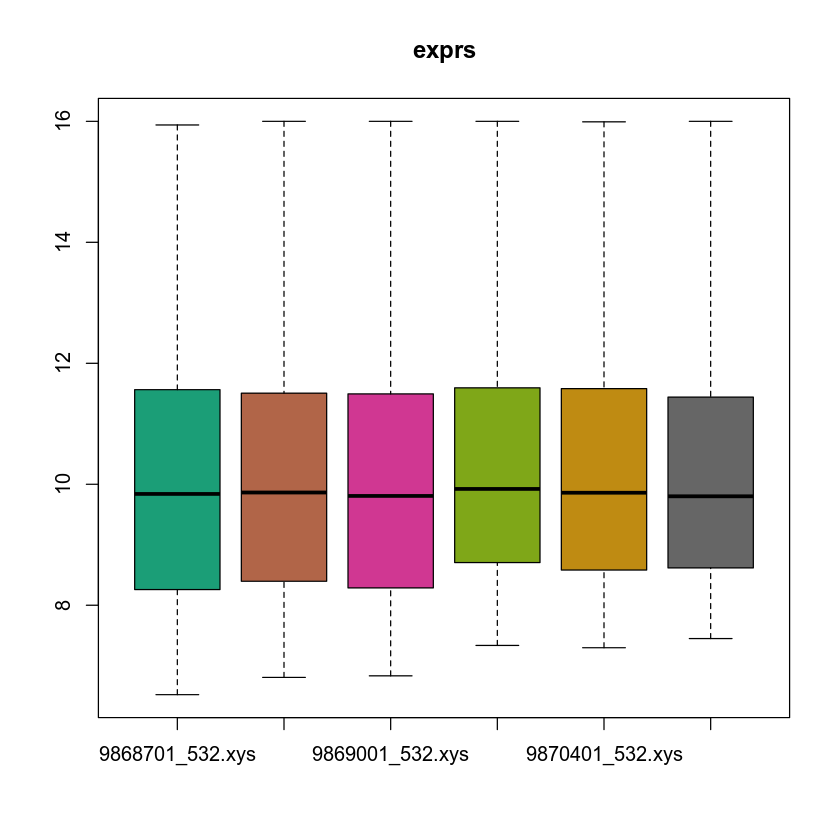

In [14]:
# Выводим boxplot с распределениями данных
oligo::boxplot(maqc)

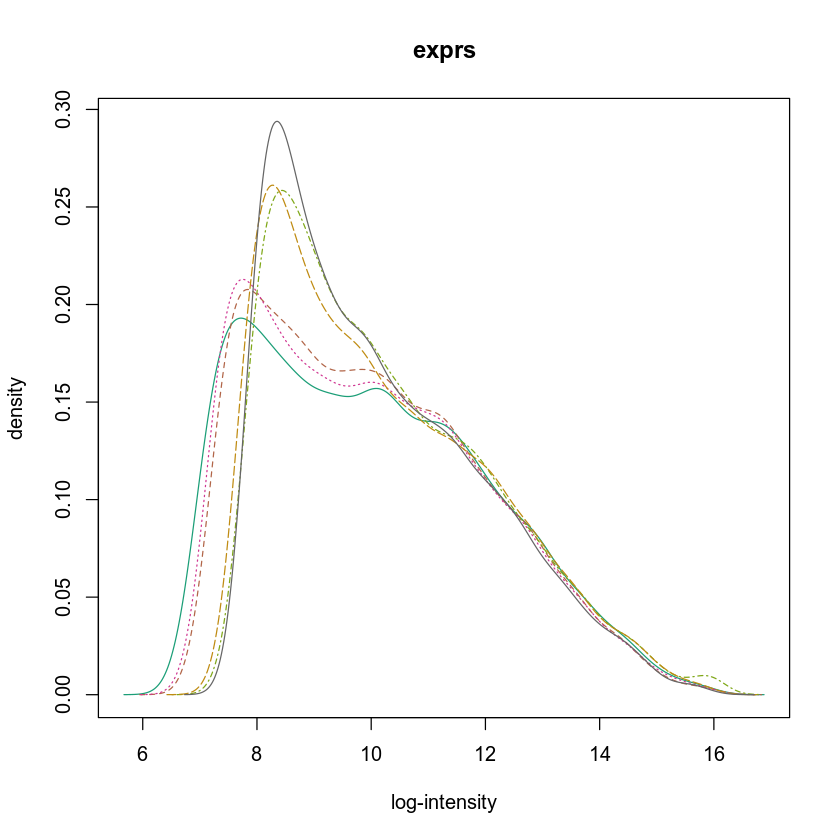

In [15]:
# гистограмма данных
oligo::hist(maqc)

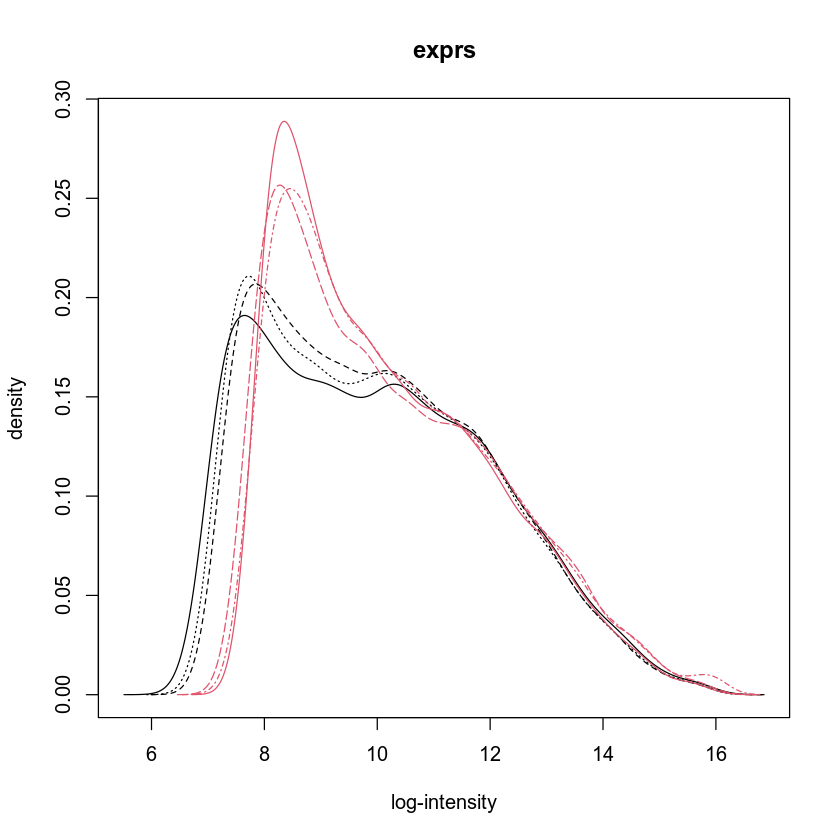

In [19]:
# гистограмма по классам
# Видно, что середнее значение у данных немного разное
# Это означает, что распределение у наших классов
# немного разное
oligo::hist(maqc, col=c(1, 1, 1, 2, 2, 2))

In [20]:
# Нормализуем данные с помощью RMA
eset <- oligo::rma(maqc)

Background correcting
Normalizing
Calculating Expression


In [26]:
head(Biobase::exprs(eset))

,9868701_532.xys,9868901_532.xys,9869001_532.xys,9870301_532.xys,9870401_532.xys,9870601_532.xys
NM_000014,12.286393,12.272719,12.200675,13.293829,13.463383,13.342834
NM_000015,4.455020,4.625539,4.983707,4.979084,4.953028,5.191547
NM_000016,12.386405,12.203391,12.371974,12.740467,12.747468,12.572569
NM_000017,8.516991,8.541788,8.788435,9.275252,9.528687,9.333948
NM_000018,12.578168,12.414070,12.532205,13.211555,13.380439,13.240004
NM_000019,11.698035,11.636985,11.716222,12.508471,12.624998,12.553513


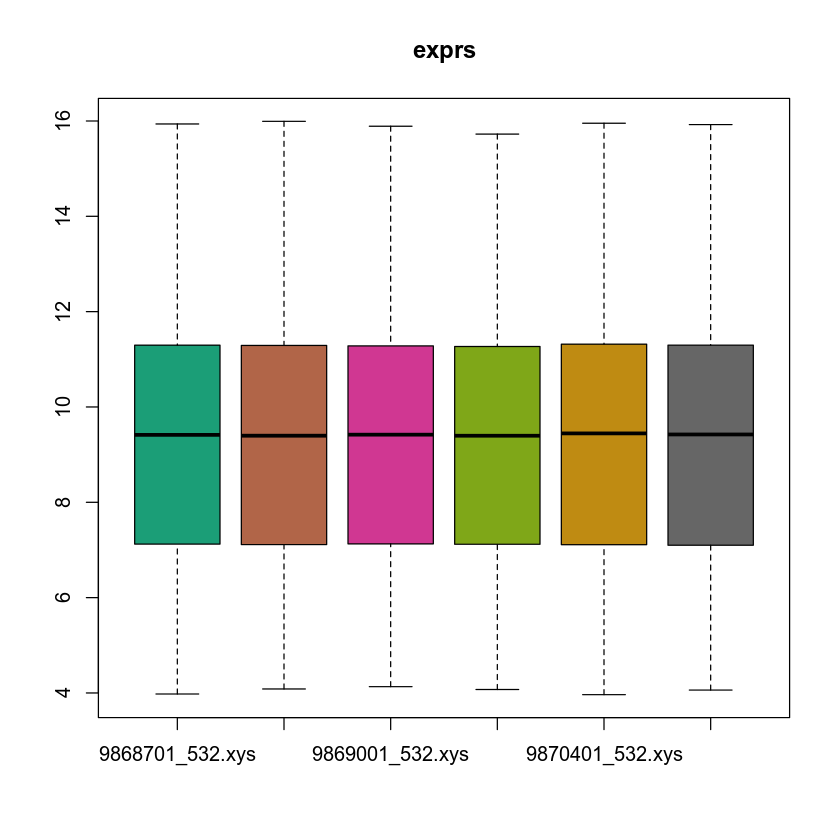

In [29]:
# Как мы видим, среднии значения у классов
# стали примерно равными
boxplot(eset)

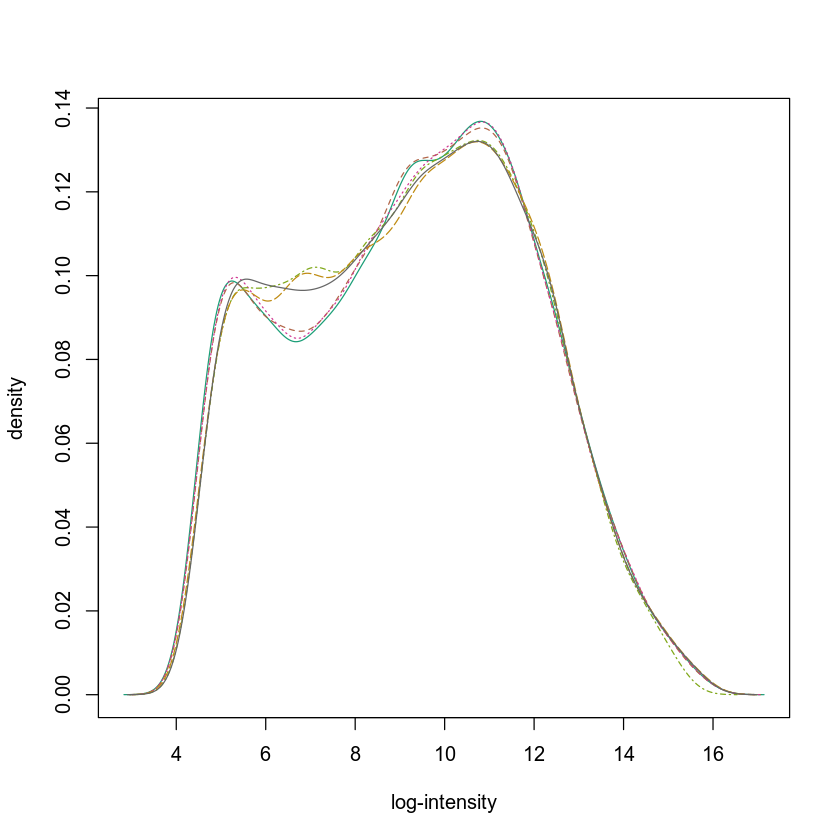

In [30]:
# При этом гистограмма у обоих классов
# стала больше двугорбовая
hist(eset)

In [37]:
# Получаем экспрессию генов и ее логарифмируем
# чтобы привести к более нормальному виду
exprs.data <- Biobase::exprs(eset)

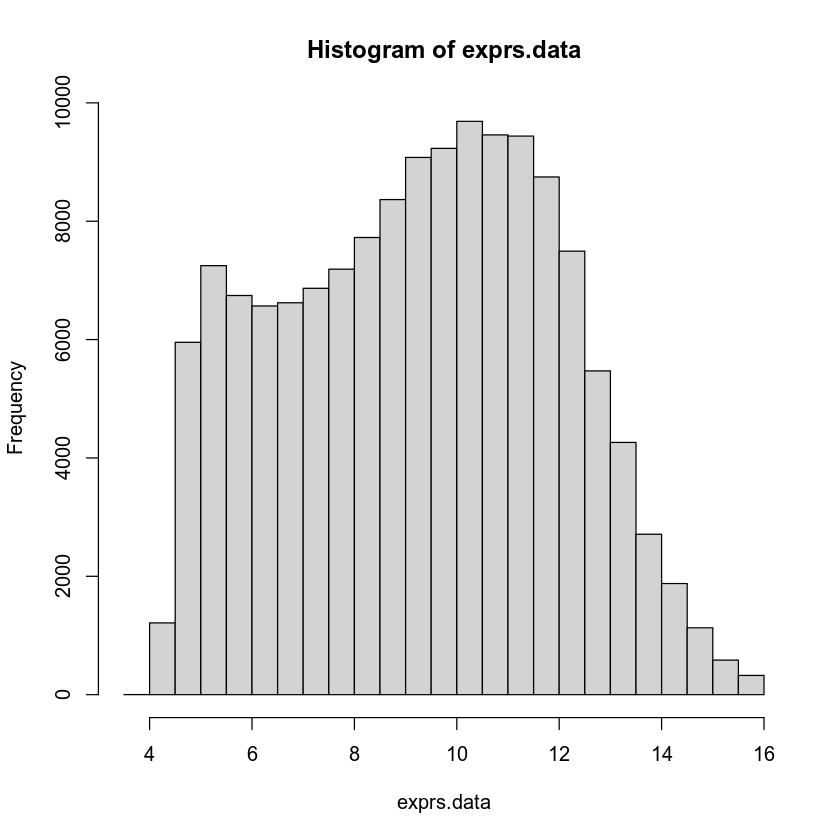

In [51]:
hist(exprs.data)

In [40]:
# Вычисляем PCA c помощью функции prcomp
# Функция t транспонирует матрицу
PCA_raw <- stats::prcomp(t(exprs.data), scale. = FALSE)
summary(PCA_raw)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5       PC6
Standard deviation     154.619 15.85871 13.72867 12.36662 11.03457 1.359e-13
Proportion of Variance   0.971  0.01021  0.00765  0.00621  0.00495 0.000e+00
Cumulative Proportion    0.971  0.98119  0.98884  0.99505  1.00000 1.000e+00

In [42]:
# Вычисляем среденее отклонение по каждому вектору
# В процентах
se <- PCA_raw$sdev^2
percentVar <- round(100 * se / sum(se), 1)
percentVar

[1] 97.1  1.0  0.8  0.6  0.5  0.0

In [43]:
dataGG <- data.frame(PC1 = PCA_raw$x[,1], PC2 = PCA_raw$x[,2])
dataGG

,PC1,PC2
,<dbl>,<dbl>
9868701_532.xys,-141.5942,0.2541139
9868901_532.xys,-140.8695,-8.2564545
9869001_532.xys,-140.9714,8.1585660
9870301_532.xys,139.8521,-25.6122665
9870401_532.xys,142.0576,4.2809930
9870601_532.xys,141.5253,21.1750482


In [48]:
# Подключаем библиотеку ggplot
# для работы с графиками
library(ggplot2)

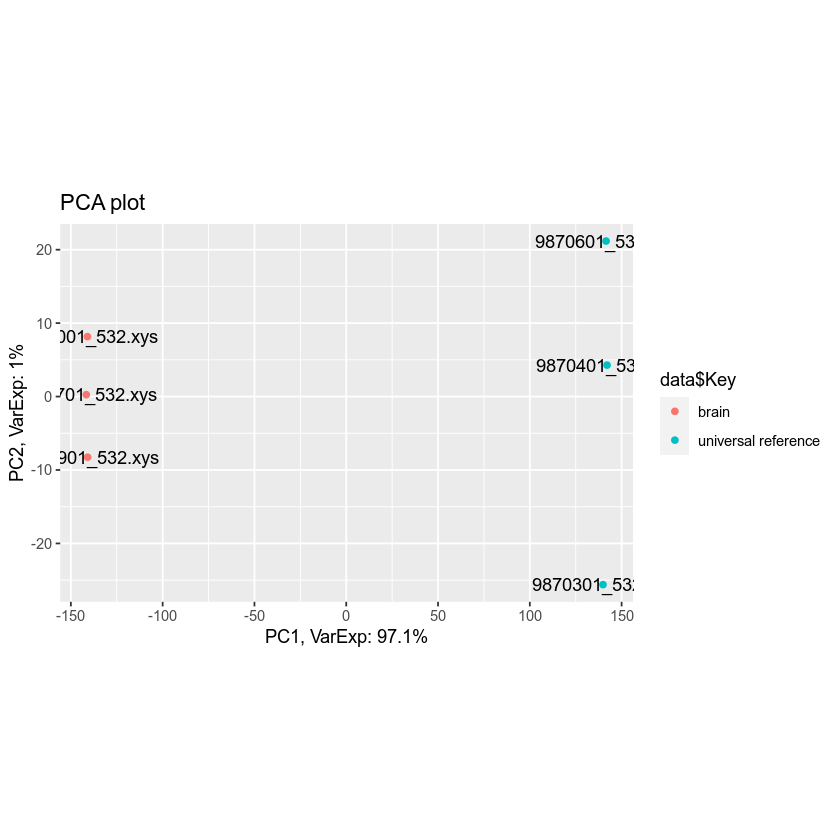

In [53]:
# Выводим PCA
# В основном все функции, которые написаны в этом блоке
# относятся к пакету ggplot2
# Здесь видно,что по первой компоненте классы хорошо разделяются

ggplot(dataGG, aes(PC1, PC2)) +
geom_point(aes(colour = data$Key)) +
geom_text(label = colnames(eset)) +
ggtitle("PCA plot") + 
xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) + 
ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
coord_fixed(ratio = 4)

### Heatmap, CLustermap

In [57]:
# Подключаем б
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




In [ ]:
# Сократим кол-во данных, чтобы не занимать много памяти
s <- exprs.data[1:12000, 1:6]
colnames(s) <- data$Key

# С помощью heatmap.2.строим Clustermap
# trace='none' нужен для того, чтобы не выводить голубую линию
heatmap.2(s, scale='row', trace='none')

In [18]:
#BiocManager::install("edgeR")
library(edgeR)

Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:oligo’:

    backgroundCorrect


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [129]:
#Создаем группу
group <- c("brain", "brain", "brain", "reference", "reference", "reference")
group <- as.factor(group)
table(group)

group
    brain reference 
        3         3 

In [130]:
# Создаем дизайн исследования
design <- model.matrix(~ 0 + group)
colnames(design) <- levels(group)
design

,brain,reference
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1


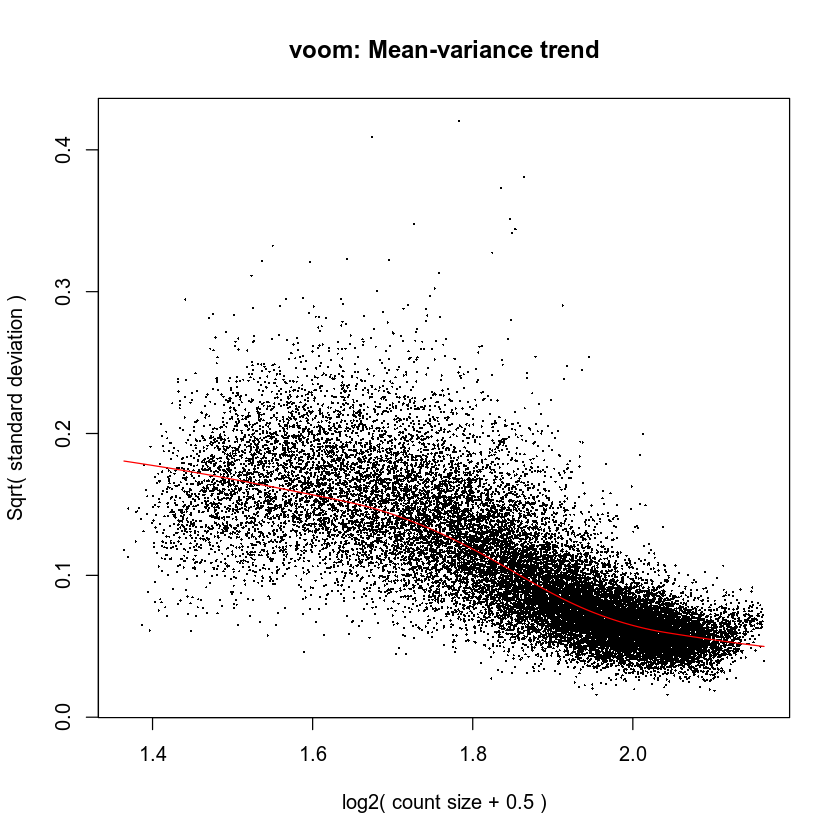

In [131]:
# Применяем voom нормализацию 
v <- limma::voom(exprs.data, design, plot = TRUE)

In [132]:
# Смотрим из каких компонентов состоит voom
v

,9868701_532.xys,9868901_532.xys,9869001_532.xys,9870301_532.xys,9870401_532.xys,9870601_532.xys
NM_000014,5.768666,5.767741,5.764916,5.808796,5.812670,5.808506
NM_000015,5.135322,5.164105,5.220439,5.220809,5.214581,5.249271
NM_000016,5.772757,5.764874,5.771961,5.787736,5.785666,5.779003
NM_000017,5.570498,5.571820,5.588363,5.619958,5.632645,5.621391
NM_000018,5.780478,5.773518,5.778433,5.805740,5.809641,5.804701
NM_000019,5.743654,5.740599,5.744245,5.778537,5.780841,5.778242
NM_000020,5.596441,5.614762,5.589902,5.442552,5.487014,5.459021
NM_000021,5.746507,5.748215,5.747812,5.728766,5.719059,5.728874
NM_000022,5.596942,5.565224,5.571979,5.764786,5.769848,5.773424
NM_000023,5.598155,5.606513,5.602363,5.568571,5.526841,5.510379


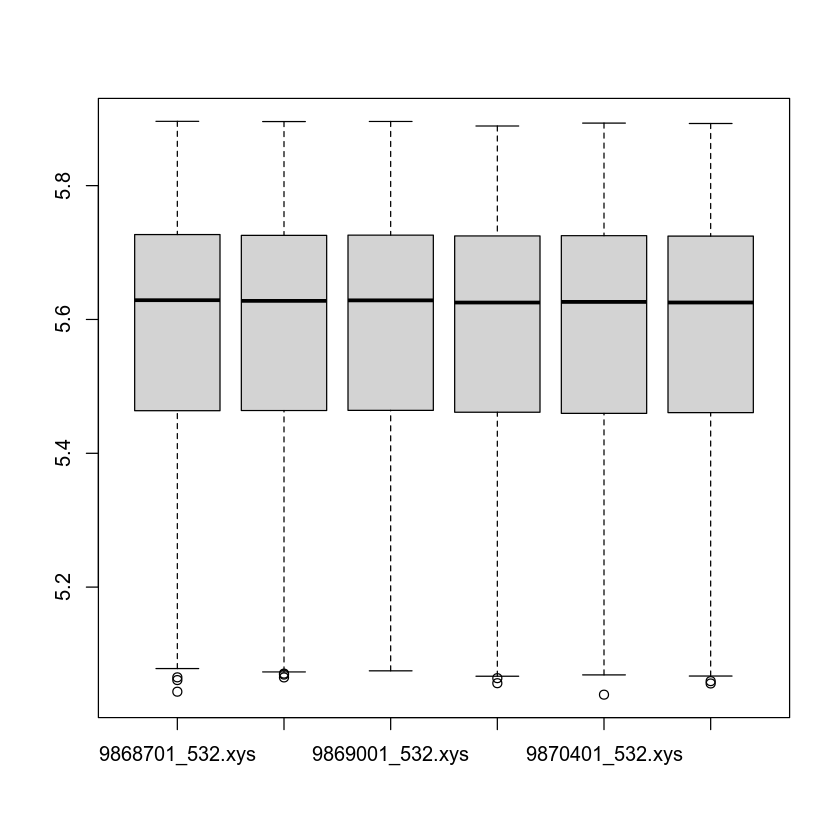

In [133]:
# смотрим на распределение экспресии после применения voom
boxplot(v$E)

In [134]:
# обучаем линейную модель
fit <- limma::lmFit(v)
fit

,brain,reference
NM_000014,5.767107,5.809997
NM_000015,5.173294,5.228230
NM_000016,5.769861,5.784120
NM_000017,5.576896,5.624718
NM_000018,5.777474,5.806699
NM_000019,5.742831,5.779211
NM_000020,5.600382,5.462974
NM_000021,5.747512,5.725541
NM_000022,5.578023,5.769373
NM_000023,5.602351,5.535012


In [135]:
# смотрим, что у нас лежит в этой модели
names(fit)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "Amean"           
 [9] "method"           "design"

In [136]:
# создаем contrast матрицу
cont.matrix <- limma::makeContrasts(reference - brain, levels=design)
cont.matrix

,reference - brain
brain,-1
reference,1


In [137]:
fit.cont <- limma::contrasts.fit(fit, cont.matrix)
fit.cont

,reference - brain
NM_000014,0.0428896068
NM_000015,0.0549366997
NM_000016,0.0142590019
NM_000017,0.0478222661
NM_000018,0.0292255532
NM_000019,0.0363792407
NM_000020,-0.1374078766
NM_000021,-0.0219710419
NM_000022,0.1913496647
NM_000023,-0.0673385945


In [138]:
fit.cont <- limma::eBayes(fit.cont)
fit.cont

,reference - brain
NM_000014,0.0428896068
NM_000015,0.0549366997
NM_000016,0.0142590019
NM_000017,0.0478222661
NM_000018,0.0292255532
NM_000019,0.0363792407
NM_000020,-0.1374078766
NM_000021,-0.0219710419
NM_000022,0.1913496647
NM_000023,-0.0673385945


In [139]:
names(fit.cont)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "Amean"           
 [9] "method"           "design"           "contrasts"        "df.prior"        
[13] "s2.prior"         "var.prior"        "proportion"       "s2.post"         
[17] "t"                "df.total"         "p.value"          "lods"            
[21] "F"                "F.p.value"

In [141]:
# смотрим на распределение экспрессии генов
summa.fit <- limma::decideTests(fit.cont)
summary(summa.fit)

       reference - brain
Down                8658
NotSig              5247
Up                 10095

In [142]:
# Выводит только самые значимые гены
# В coef пишем имя, которое мы давали колонкам в cont.matrix
stat <- limma::topTable(fit.cont, coef=colnames(cont.matrix), sort.by="p")
stat

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XM_928134,-0.2046438,5.792044,-71.72330,1.331904e-15,1.386346e-11,26.52292
NM_020988,-0.2231934,5.779746,-69.27451,1.924279e-15,1.386346e-11,26.14409
NM_004171,-0.1970937,5.764135,-65.30063,3.597134e-15,1.386346e-11,25.52520
NM_020465,-0.1681720,5.802666,-65.11902,3.704781e-15,1.386346e-11,25.47832
NM_020309,-0.2613279,5.751026,-64.58773,4.040482e-15,1.386346e-11,25.30084
NM_133499,-0.2447043,5.756075,-63.02188,5.239348e-15,1.386346e-11,25.10621
NM_152390,-0.1961927,5.773749,-63.01857,5.242264e-15,1.386346e-11,25.15508
NM_004065,-0.1856013,5.801387,-62.96043,5.293742e-15,1.386346e-11,25.12218
NM_003385,-0.2149673,5.768872,-62.47063,5.750011e-15,1.386346e-11,25.06008


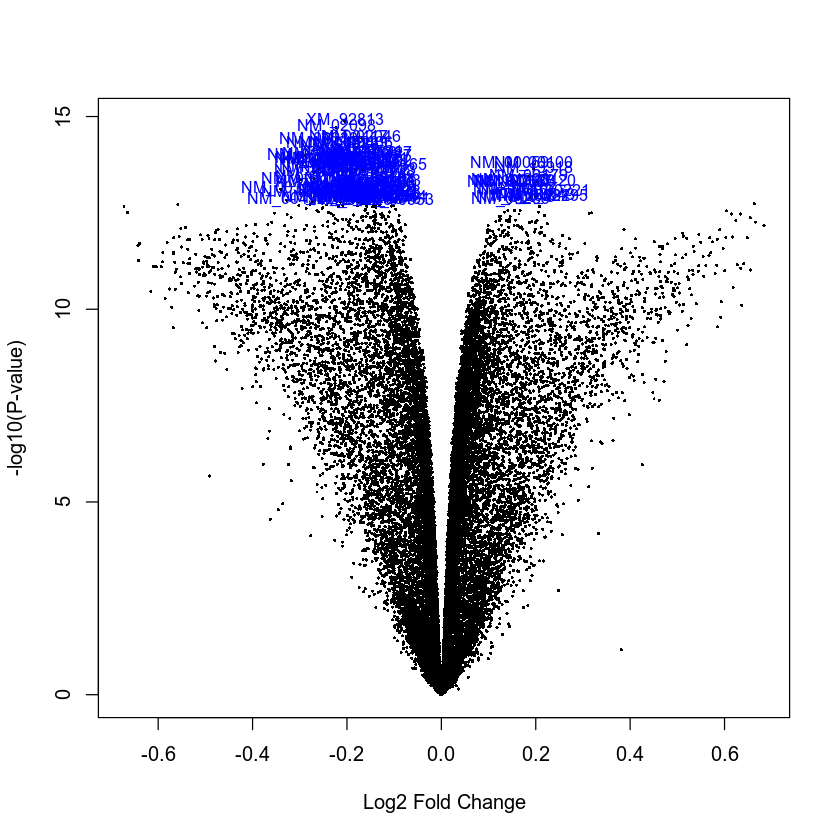

In [150]:
limma::volcanoplot(fit.cont,
                   coef = colnames(cont.matrix),
                   highlight = 100,
                   names  = rownames(fit.cont))

In [160]:
# Считаем статистики по всем генам
allStat <- limma::topTable(fit.cont,
                           coef = colnames(cont.matrix),
                           sort.by="p",
                           number = dim(fit.cont)[1])
head(allStat)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XM_928134,-0.2046438,5.792044,-71.72330,1.331904e-15,1.386346e-11,26.52292
NM_020988,-0.2231934,5.779746,-69.27451,1.924279e-15,1.386346e-11,26.14409
NM_004171,-0.1970937,5.764135,-65.30063,3.597134e-15,1.386346e-11,25.52520
NM_020465,-0.1681720,5.802666,-65.11902,3.704781e-15,1.386346e-11,25.47832
NM_020309,-0.2613279,5.751026,-64.58773,4.040482e-15,1.386346e-11,25.30084
NM_133499,-0.2447043,5.756075,-63.02188,5.239348e-15,1.386346e-11,25.10621


In [167]:
# Записываем результат
write.csv(allStat, file = "../data/allStat.csv")